# Генератор случайных чисел

In [3]:
%pylab inline
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


Рассмотрим результаты вызова функции `normal()` с параметром size больше 1.

In [2]:
seed(777)

In [3]:
x = normal(size=40)
x

array([-0.46820879, -0.82282485, -0.0653801 , -0.71336192,  0.90635089,
        0.76623673,  0.82605407, -1.32368279, -1.75244452,  1.00244907,
        0.54480945,  1.8951609 , -0.76935745, -1.40309592, -0.63246751,
       -0.55887367, -1.23323138, -0.43950352,  0.91478726,  0.26504093,
       -1.38337015,  0.6855118 ,  0.45609091, -0.46137426,  0.0947003 ,
       -1.54281161,  2.4793696 ,  0.45686676, -0.31387278,  0.02103738,
        0.96079316,  0.0584829 , -0.44603217,  0.31919714,  0.84116862,
       -1.53276199, -0.28158426,  1.74445271, -0.67423891,  0.58840123])

Возвращаемый массив чисел включает положительные и отрицательные числа, самое маленькое из которых около -2, а самое большое - около +2.

Для удобства восприятия будем выводить числа в созданном массиве в виде рисунка. 
Замените последнюю строку в блоке кода на команду построения рисунка `plot(x, 'o');`. 
Таким образом, при выполнения кода ячейки мы будем создавать массив чисел и тут же отображать его на рисунке.
Для многократного выполнения кода ячейки нажимайте `Ctrl-Enter`.

Команда `plot()` (англ. чертеж) рисует график по заданным координатам.
Если на вход функции подать только один массив чисел, то по горизонтальной оси откладывается их порядковый номер, а их собственные значения откладываются по вертикали.
Второй параметр функции - это формат графика, буква `'o'` означает круглые точки без соединительной линии между ними.


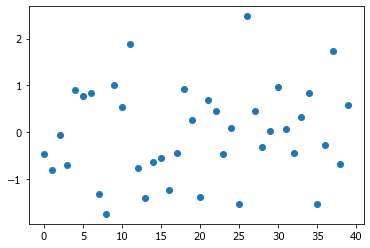

In [4]:
plot(x, 'o');

Попробуем увеличить размер выборки (например, 400, 4000).

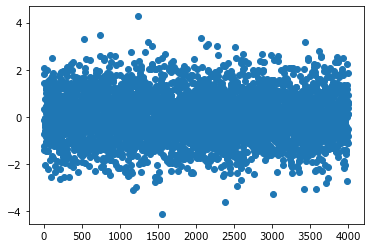

In [5]:
x = normal(size=4000)
plot(x, 'o');

При большом количестве исходов видно, что случайная нормальная выборка представляет собой массив положительных и отрицательных чисел в диапазоне от -3 до 3.
Очень редко встречаются числа с удалением на 4 и более единиц, большинство значений заполняют диапазон между -2 и 2.

Для наглядного представления построим гистограмму распределения.

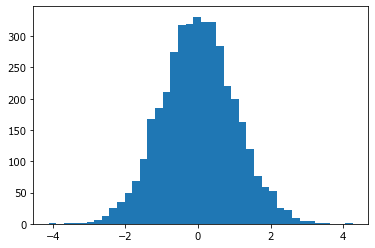

In [6]:
hist(x, bins=40);

Для генератора выборки из нормального распределения можно задать два параметра - `loc` (локализацию) и `scale` (шкалу, размах). Локализация сдвигает центр распределения туда, где ожидается среднее значение. Шкала задает размер ожидаемого стандартного отклонения.

По-умолчанию `loc=0.0, scale=1.0`, что дает стандартное нормальное распределение.

Если при z-нормализации мы отнимаем среднее и делим на стандартное отклонение, то при генерации распределения с заданными параметрами мы прибавляем среднее (задаем `loc`) и умножаем на стандартное отклонение (задаем `scale`).

Попробуем сгенерить выборку с заданными параметрами и посчитаем ее среднее и стандартное отклонение.

In [23]:
seed(11)

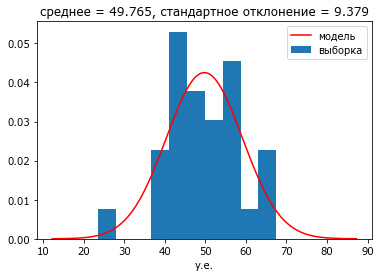

In [24]:
x = normal(loc=50, scale=10, size=30)
hist(x, density=True, label='выборка')

M=mean(x); S=std(x);
xx = arange(M-4*S, M+4*S, 0.01) #подробные значения абсцисс для гладкой кривой
yy = stats.norm.pdf(xx, M,S)
plot(xx, yy, 'r-', label='модель'); legend(); xlabel('у.е.');
title(f'среднее = {M:.3f}, стандартное отклонение = {S:.3f}');

In [25]:
M + array([-1,1])*S/(30**.5)

array([48.05256978, 51.47724929])

На полученном рисунке можно проиллюстрировать основную догму классической статистики.

*Генеральная совокупность* (population) - гипотетическая и потенциально бесконечная группа объектов. В данном случае мы получаем её искусственно, и поэтому знаем её истинные параметры - это те параметры, с которыми мы запускаем генератор случайных чисел - среднее 50 и стандартное отклонение 10.

Из этого потенциально бесконечного множества мы извлекли достаточную с точки зрения практической статистики *выборку* (sample) из 30 значений. В реальной практике эти значения - всё что у нас есть для проведения статистического анализа по результатам экспериментов. Мы считаем выборочные параметры и используем их как приблизительную оценку параметров генеральной совокупности. В данном случае среднее - 49.765, а стандартное отклонение - 9.38.

Классическая статистика разработала математический аппарат для того, чтобы по выборочным оценкам судить о недоступных для непосредственного измерения параметрах генеральной совокупности. Эти суждения носят вероятностный характер. В каждом случае используется свой критерий. Например, можно предсказать, что с вероятностью 95% реальное среднее значение генеральной совокупности (математики говорят *математическое ожидание*) будет находиться близко к выборочному среднему
в интервале от 48.05 до 51.48.
То есть, если мы будем извлекать такие выборки снова и снова (например, сто раз), то в 95% случаев эмпирическое выборочное среднее попадет в этот интервал.
Такой интервал называется *доверительный интервал* (confidence interval).

Еще раз обратим внимание, что истинные параметры генеральной совокупности недоступны для измерения, и в данном случае мы их знаем только потому, что мы генерировали искусственные данные с заранее известными характеристиками распределения.

Генерация случайных выборок - это особый вид экспериментов с числами - *вычислительные эксперименты*. С помощью вычислительных экспериментов можно проверять эффективность различных статистических методов при оценке параметров сложных математических моделей.

Также можно сгенерить выборки для других важных статистических распределений.
- np.random.standard_t - $t$ Стьюдента
- np.random.chisquare - $\chi ^2$ (хи-квадрат)
- np.random.exponential - экcпоненциальное
- np.random.binomial - биномиальное
- np.random.poisson - Пуассона

См. [Полный список в документации](https://numpy.org/doc/stable/reference/random/legacy.html#distributions)

Функции для генерации входят в модуль `random` пакета `numpy`, поэтому полный путь к ним будет, например, таким: `np.random.normal()`. Однако при использовании команды `%pylab` они становятся доступны без преамбулы. Чтобы убедиться, что переменные ссылаются на один и тот же объект используют оператор `is`.

In [28]:
np.random.binomial is binomial

True

> Попробуйте сгенерить выборки для всех упомянутых видов распределений. Для некоторых из них необходимо указать параметры (см. справку к этим функциям: `Shift-Tab` после открывающей скобки). При этом обратите внимание на то, как параметры влияют на форму гистограммы.

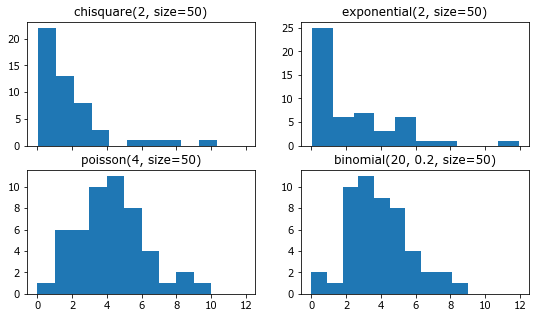

In [57]:
seed(19)
fig, ax = subplots(2,2, sharex=True, figsize=(9,5))
ax=ax.ravel()
cc = [
    'chisquare(2, size=50)',
    'exponential(2, size=50)',
    'poisson(4, size=50)',
    'binomial(20, 0.2, size=50)',
]
for i,c in enumerate(cc):
    sca(ax[i])
    hist(eval(c))
    title(c)

::: {figure} hist4
![](i/trans4.png)

Гистограммы выборок одного размера, сгенерированных для разных типов распределений.
:::

Давайте *экспериментально* убедимся, что распределение Стьюдента при повышении степеней свободы переходит в нормальное.

Сравним генерацию выборок с моделями, вычисленными по формулам. Функции для работы со статистическими моделями доступны в модуле `scipy.stats`. Для каждого распределения можно получить моменты, PDF (Probability density function, плотность распределения), CDF (Cumulative distribution function), PPF (Percent point function) и др. производные от них функции.

:::{figure} student_normal
![](i/student_normal.png)

Сравнение эмпирических и теоретических распределений Стьюдента и нормального
:::

При повышении параметра $df$ степени свободы распределение Стьюдента становится неотличимым от нормального. 
Параметр степень свободы на 1 меньше количества экземляров в выборке. $df=6$ соответствует выборке из 7 объектов. Это считается маленькой выборкой. 

Различие $t-$распределения Стьюдента от нормального связано с более толстыми хвостами, то есть вероятность отклонения значений дальше от центра чуть выше, чем у нормального распределения. Поскольку часть вероятности "уходит" в хвосты, то вершина чуть ниже.

При размере выборки 30 и выше различия полностью нивелируются, поэтому считается, что при таких выборках распределения Стьюдента утрачивает своё преимущество.
На малых же выборках "толстохвостое" распределение даёт более точные оценки параметров локализации и разброса.

Размер выборки экспериментальных данных, при котором гистограммы эмпирических распределений начинают соответствовать теоретическим, составляет $10^4...10^5$.
При меньших размерах форма эмпирических распределений сильно варьирует и различия между распределениями скрадываются.

Для представления о том, настолько вариативны выборки при одних и тех же характеристиках генераторов, подвигайте бегунок параметра `iseed`.
Если в выборках из сотни значений основная плотность всегда распределена около нуля, то в выборках из десятка значений иногда попадаются случаи, когда большинство значений одного цвета сильно смещены в одну половину диапазона.
Также, в одних случаях все исходы компактно группируются между -2 и 2, то в других сразу несколько значений могут выйти за границы 3 стандартных отклонений от центра.

Развитие интуиции о принципиальной неустойчивости выборочных оценок полезно для специалистов, которым приходится интерпретировать результы нативных наблюдений с небольшим количеством данных.

## Воспроизводимая генерация случайных чисел

*Генератор случайных чисел (ГСЧ)* работает по специальному алгоритму так, что следующее сгенерированное число невозможно предсказать.

:::{note}
В большинстве совремного программного обеспечения используется алгоритм, разработанный в 1997 году под названием [Вихрь Мерсенна](https://ru.wikipedia.org/wiki/Вихрь_Мерсенна).
«Вихрь» — это преобразование, которое обеспечивает равномерное распределение генерируемых псевдослучайных чисел в 623 измерениях. 
Псевдослучайная последовательность, порождаемая вихрем Мерсенна MT19937, имеет очень большой период, равный числу Мерсенна $2^{19937} − 1$ (более $10^{6001}$), что более чем достаточно для многих практических приложений.
:::

Однако, это чёткий алгоритм, и если запустить его из идентичного состояния, то получится идентичная последовательность чисел. Это очень удобно для исследований и демонстрации конкретных исходов экспериментов с генерацией распределений.

Состояний для запуска ГСЧ может быть очень много. Для выбора конкретного состояния используется функция `seed()` (англ. семя, сеять).
Вспомните фразу: "игрок, посеянный под 7-м номером". Т.е. это семя, с которым "сеют" случайные числа.

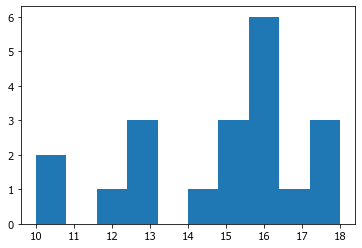

In [65]:
seed(1234567)
hist(binomial( 20, 0.7, size=20 ));

Аргументом функции `seed()` может быть любое целое число, сколь угодно большое, а также отрицательное.
Отменить действие "фиксированного" в каком-то состоянии ГСЧ можно запуском команды без аргумента или с нулем `seed(0)`.

> Попробуйте многократно выполнить код для генерации гистрограммы распределения на последнем рисунке, меняя семя на другие числа и на 0.

> Для наглядности скопируйте ячейку и вставьте тут же. Если задать одинаковое число для инициализации ГСЧ, то получатся идентичные рисунки.

В командном режиме для получения дубликата ячейки достаточно нажать клавиши `CV`.

Идентичный рисунок (полученный на идентичной последовательности чисел, сгенерированных ГСЧ в одинаковых состояниях) будет получатся не только на Вашем компьютере, но и на любом другом компьютере во всем мире, где установлена похожая версия программного обеспечения. 
Эта особенность делает возможным создание расчётных заданий, в которых на каком-то этапе используются случайные числа.